<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Data2020/BTC_Robustness_ClusteringJan13_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

Mounted at /content/drive
Authenticated


In [2]:
import pandas as pd 
import numpy as np

In [3]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/btc_Kmeans_2020_12_31.csv',index_col='Unnamed: 0')
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2020-12-27,1049825.0,148.0,193716651.0,1.308896e+06,3.033870,4.911576e+11,1.618915e+11,1.866826e+13,0.000295,7.792538,0.000158,4.162860,89.698259,2.370802e+06,1.373446e+08,925.0,1.816875,2.444854e+07,925.0,2.444854e+07,76.839437,114.994093,1.0,26430.856597,261.737332,54.551925,1.858273e+07,2.056073e+07,1.449817e+07,304240.0,808638.0,241838.497017,6.391999e+09,0.657102,17367.771562,0.005215,137.846432,531357.733666,1.404424e+10,0.027924,0.034667,0.034255,4.905674e+10,1.751811,5.544874e+10,8.238012,2.681934e+07,2.100175e+10,50.174128,1.102133e+12,2.398156,0.017810,0.121826,0.112338,0.063885,0.089066,0.123253,0.132847,0.090978,0.028995,0.118794,0.100206,0.595074,0.471821,0.338974,0.247995,0.219001,0.100206,279.837598,94.450699,0.034667,0.034255,0.030030,0.027924,487.366929,54.231945,NaN,NaN,NaN,54.551925,98.872856,146.386991,189.052387,NaN,NaN,NaN,NaN
2020-12-28,1154354.0,160.0,206766595.0,1.292291e+06,3.033361,5.024921e+11,1.656552e+11,1.859959e+13,0.000327,8.834168,0.000164,4.436346,102.752936,2.778372e+06,1.479345e+08,1000.0,1.964065,2.703935e+07,1000.0,2.703935e+07,46.737221,115.311281,1.0,27039.349020,265.812917,52.374044,1.858373e+07,2.056098e+07,1.449831e+07,314503.0,874761.0,397621.711422,1.075143e+10,0.809730,21894.585318,0.005513,149.061442,708320.652738,1.915253e+10,0.027950,0.034447,0.034285,4.526595e+10,1.754172,5.601738e+10,8.071835,2.981772e+07,2.103157e+10,46.170214,1.332533e+12,2.029169,0.021149,0.127496,0.111604,0.063451,0.083734,0.121085,0.132213,0.091246,0.028996,0.118805,0.100221,0.592565,0.471481,0.339268,0.248022,0.219026,0.100221,272.669458,99.165301,0.034447,0.034285,0.030060,0.027950,474.438581,56.992307,NaN,NaN,NaN,52.374044,100.659837,149.414196,192.591228,NaN,NaN,NaN,NaN
2020-12-29,1146131.0,152.0,194179955.0,1.277500e+06,3.006909,5.060833e+11,1.683068e+11,1.859959e+13,0.000313,8.530911,0.000164,4.470274,104.816233,2.854272e+06,1.405378e+08,950.0,1.865880,2.586964e+07,950.0,2.586964e+07,54.785860,114.333016,1.0,27231.203455,276.673228,49.697118,1.858468e+07,2.056122e+07,1.449554e+07,334580.0,924443.0,339224.096073,9.237480e+09,0.765763,20852.655461,0.005631,153.351433,707904.496552,1.927709e+10,0.027902,0.034408,0.034289,5.128744e+10,1.754900,6.052492e+10,8.052861,2.872392e+07,2.106029e+10,48.270913,1.313616e+12,2.072995,0.019785,0.135661,0.105108,0.064458,0.082931,0.120875,0.131812,0.091394,0.028982,0.118768,0.100227,0.592058,0.471183,0.339371,0.247977,0.218996,0.100227,271.682580,100.231688,0.034408,0.034289,0.030010,0.027902,473.544137,57.505101,NaN,NaN,NaN,49.697118,100.180921,152.787915,199.428676,NaN,NaN,NaN,NaN
2020-12-30,1221579.0,172.0,215838093.0,1.254873e+06,3.148488,5.360990e+11,1.702719e+11,1.859959e+13,0.000315,9.091743,0.000171,4.940794,107.456738,3.099548e+06,1.590296e+08,1075.0,2.111160,3.100796e+07,1075.0,3.100796e+07,55.434481,119.111340,1.0,28844.613678,30

In [16]:
import matplotlib.pyplot as plt
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [17]:
df['PU_future180d']=df['PU Ratio'].shift(-180)
df['NVT_future180d']=df['NVTAdj90'].shift(-180)
df['PM_future180d']=df['PM'].shift(-180)


In [18]:
df_180=df[['PU Ratio','PU_future180d','NVTAdj90','NVT_future180d','future180d_ROI','PM','PM_future180d']]

In [19]:
df_180=df_180.dropna()

In [20]:
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d
2010-10-15,0.463068,1.119829,154.643925,79.217615,786.019103,30.998689,4.099103
2010-10-16,0.418963,1.288066,144.681892,84.173979,888.742343,11.602674,2.624067
2010-10-17,0.434969,1.236760,147.263082,82.118080,864.385428,18.085074,5.711558
2010-10-18,0.432914,1.384170,145.972987,85.980433,922.102400,11.418262,3.980140
2010-10-19,0.391364,1.498583,137.869691,87.829926,1025.760741,4.899486,5.625993


In [21]:
df_180.tail()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d
2020-06-30,13.206049,94.450699,84.979256,114.994093,189.052387,1.065834,2.398156
2020-07-01,13.662584,99.165301,85.716151,115.311281,192.591228,0.795228,2.029169
2020-07-02,13.401180,100.231688,84.047821,114.333016,199.428676,1.005481,2.072995
2020-07-03,13.438600,113.942405,83.336448,119.111340,218.138278,1.015975,1.932954
2020-07-04,13.776128,115.804956,83.719996,118.111923,218.014170,1.426011,2.036377


In [22]:
from sklearn.cluster import KMeans

In [23]:
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_180[['PU Ratio','PU_future180d']])
labels180 = model.predict(df_180[['PU Ratio','PU_future180d']])
labels180.reshape(-1,1)
df_180['labels180']=labels180
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d,labels180
2010-10-15,0.463068,1.119829,154.643925,79.217615,786.019103,30.998689,4.099103,1
2010-10-16,0.418963,1.288066,144.681892,84.173979,888.742343,11.602674,2.624067,1
2010-10-17,0.434969,1.236760,147.263082,82.118080,864.385428,18.085074,5.711558,1
2010-10-18,0.432914,1.384170,145.972987,85.980433,922.102400,11.418262,3.980140,1
2010-10-19,0.391364,1.498583,137.869691,87.829926,1025.760741,4.899486,5.625993,1


In [24]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,96.878378,85.978037
1,19.670365,23.399457
2,37.975885,423.458126
3,439.885527,96.684325


In [25]:
%matplotlib inline
import seaborn as sns

<Figure size 1008x720 with 0 Axes>

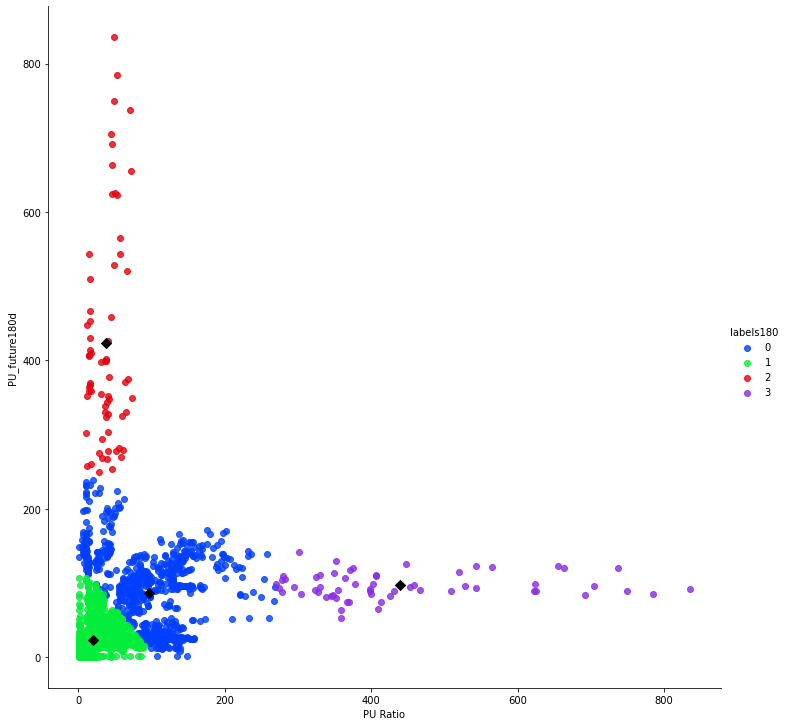

In [30]:
plt.figure(figsize=(14, 10))
sns.lmplot(x='PU Ratio', y='PU_future180d', data=df_180, hue='labels180', fit_reg=False, legend=True,height=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('/content/drive/My Drive/CVML2021/PU180_full.png')

In [31]:
df_180_ROI=df_180[['future180d_ROI','labels180']].groupby('labels180', as_index=False).agg(['min', 'max','mean','std'])
df_180_ROI.columns = ["_".join(x) for x in df_180_ROI.columns.ravel()]
df_180_ROI.index.name=None
df_180_ROI.head()

,future180d_ROI_min,future180d_ROI_max,future180d_ROI_mean,future180d_ROI_std
0,-90.097127,14130.353592,112.774660,699.301772
1,-87.585958,11519.421767,276.958188,883.274580
2,290.547135,929.905259,530.223730,149.625530
3,-66.755748,-24.709613,-47.976604,12.349797


In [32]:
df180_PU=df_180[['PU Ratio', 'PU_future180d','labels180']].groupby('labels180').agg(['min', 'max','mean','std'])
df180_PU=df180_PU.transpose()
df180_PU

labels180                    0           1           2           3
PU Ratio      min     0.622683    0.331046   10.421749  270.195448
              max   267.942508   90.126111   73.141190  835.348317
              mean   96.798643   19.694824   37.975885  439.885527
              std    48.965643   17.724811   18.009012  145.070900
PU_future180d min     0.813003    0.331046  249.717486   52.576978
              max   238.550428  107.038254  835.348317  141.949226
              mean   86.077239   23.369027  423.458126   96.684325
              std    52.445076   20.632744  147.807427   17.226735

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

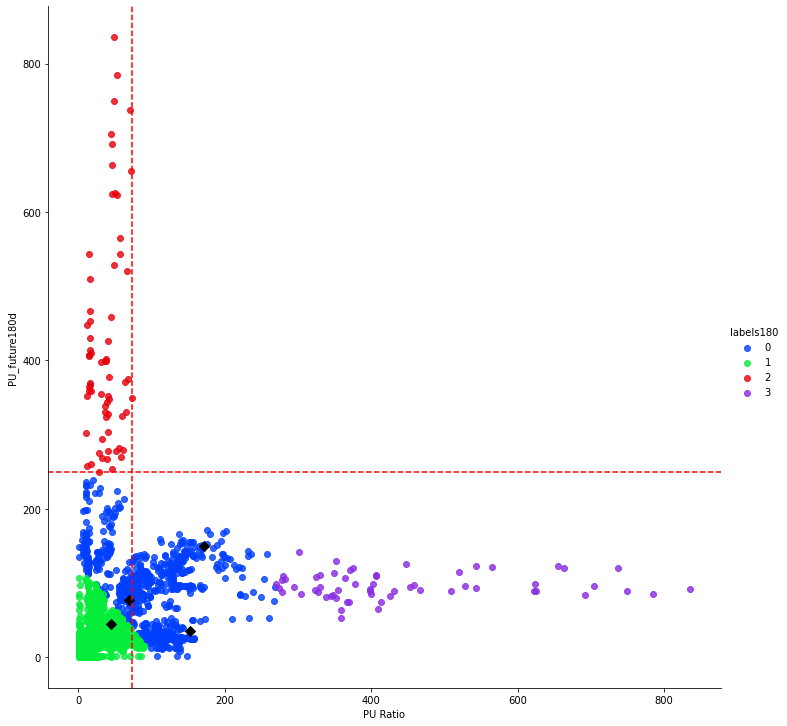

In [43]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future180d', data=df_180, hue='labels180', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.axvline(73.141190, color='red', linestyle='--')
plt.axhline(249.717486, color='red', linestyle='--')
plt.savefig('/content/drive/My Drive/CVML2021/PU80_full_annoted')

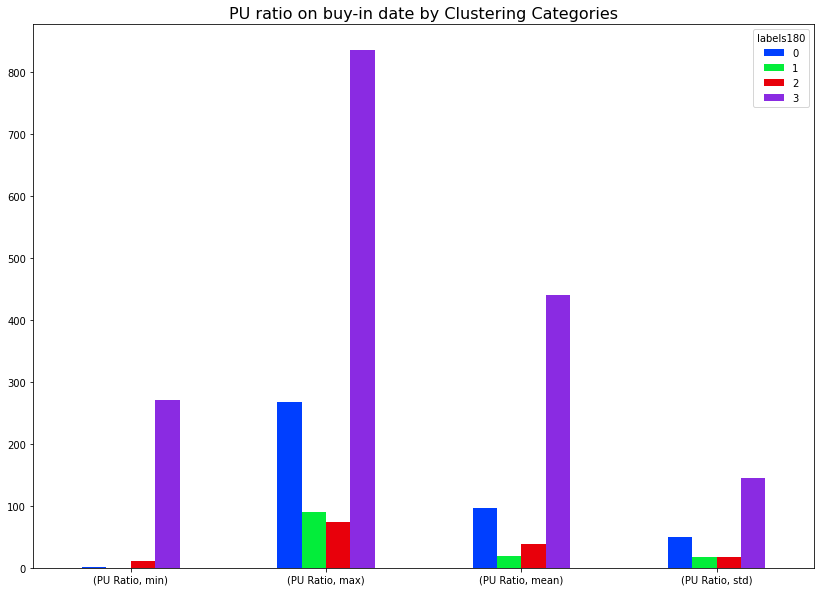

In [44]:
df180_PU.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/180PU_full_buyin')

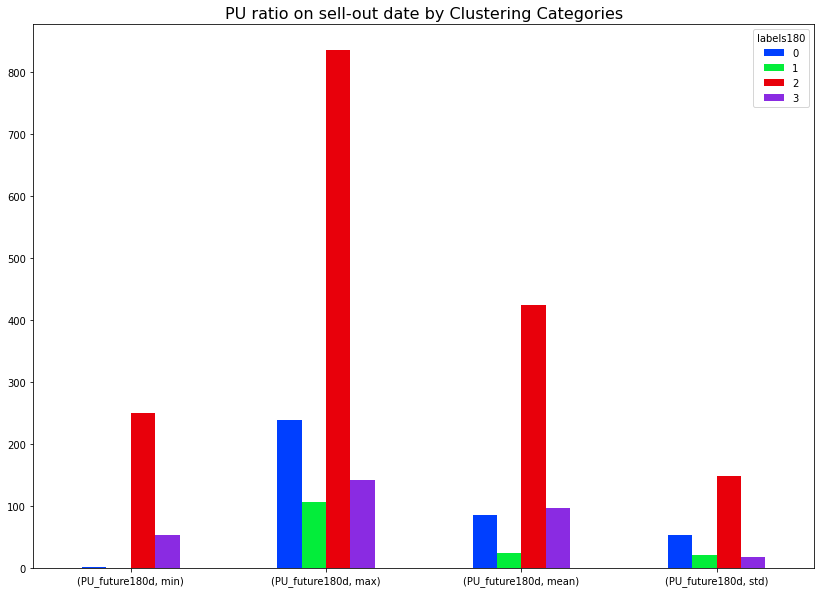

In [36]:
df180_PU.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180PU_full_sellout')

In [37]:
df_180_ROI=df_180_ROI.transpose()
df_180_ROI.columns=['labels180=0', 'labels180=1','labels180=2', 'labels180=3']
df_180_ROI.head()

,labels180=0,labels180=1,labels180=2,labels180=3
future180d_ROI_min,-90.097127,-87.585958,290.547135,-66.755748
future180d_ROI_max,14130.353592,11519.421767,929.905259,-24.709613
future180d_ROI_mean,112.774660,276.958188,530.223730,-47.976604
future180d_ROI_std,699.301772,883.274580,149.625530,12.349797


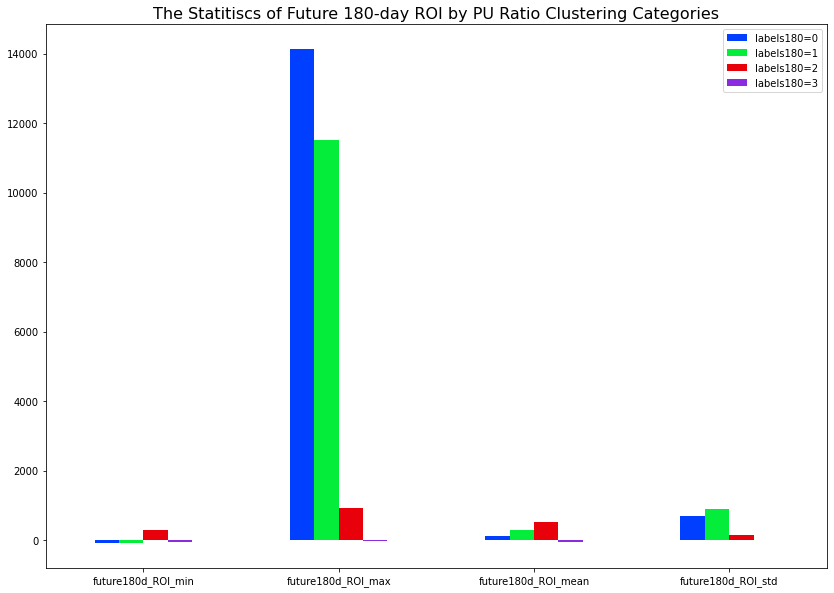

In [45]:
df_180_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 180-day ROI by PU Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/180ROI_full')

In [39]:
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d,labels180
2010-10-15,0.463068,1.119829,154.643925,79.217615,786.019103,30.998689,4.099103,1
2010-10-16,0.418963,1.288066,144.681892,84.173979,888.742343,11.602674,2.624067,1
2010-10-17,0.434969,1.236760,147.263082,82.118080,864.385428,18.085074,5.711558,1
2010-10-18,0.432914,1.384170,145.972987,85.980433,922.102400,11.418262,3.980140,1
2010-10-19,0.391364,1.498583,137.869691,87.829926,1025.760741,4.899486,5.625993,1


In [40]:
### We cluster the data by NVT today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_180[['NVTAdj90','NVT_future180d']])
labels180_NVT = model.predict(df_180[['NVTAdj90','NVT_future180d']])
labels180_NVT.reshape(-1,1)
df_180['labels180_NVT']=labels180_NVT
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d,labels180,labels180_NVT
2010-10-15,0.463068,1.119829,154.643925,79.217615,786.019103,30.998689,4.099103,1,2
2010-10-16,0.418963,1.288066,144.681892,84.173979,888.742343,11.602674,2.624067,1,2
2010-10-17,0.434969,1.236760,147.263082,82.118080,864.385428,18.085074,5.711558,1,2
2010-10-18,0.432914,1.384170,145.972987,85.980433,922.102400,11.418262,3.980140,1,2
2010-10-19,0.391364,1.498583,137.869691,87.829926,1025.760741,4.899486,5.625993,1,2


In [41]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,44.018504,44.037847
1,69.337454,77.474644
2,152.247548,34.767219
3,171.845717,150.274746


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

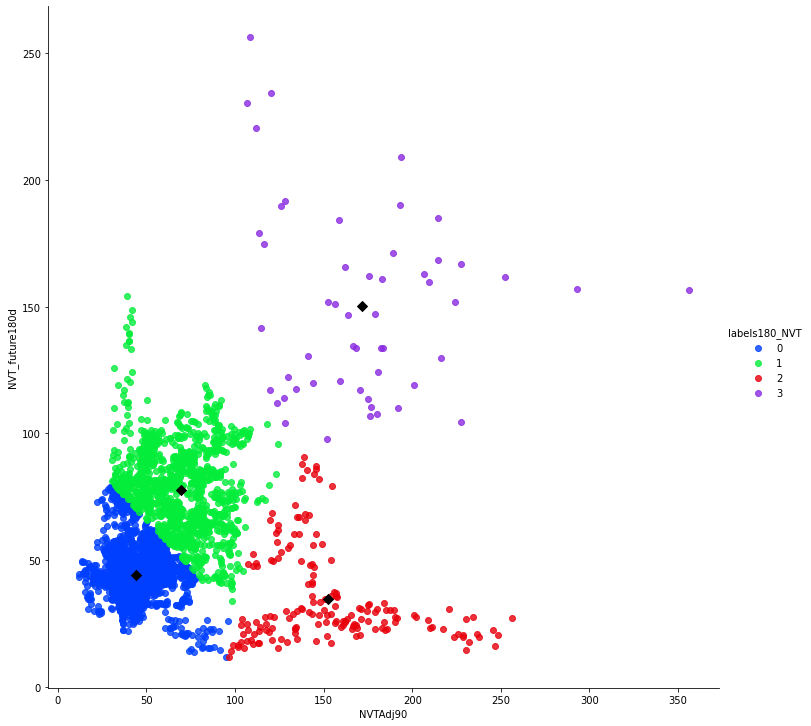

In [46]:
plt.figure(figsize=(14, 10))
sns.lmplot('NVTAdj90', 'NVT_future180d', data=df_180, hue='labels180_NVT', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('/content/drive/My Drive/CVML2021/NVT180_full')

In [49]:
df_180_ROI=df_180[['future180d_ROI','labels180_NVT']].groupby('labels180_NVT', as_index=False).agg(['min', 'max','mean','std'])
df_180_ROI.columns = ["_".join(x) for x in df_180_ROI.columns.ravel()]
df_180_ROI.index.name=None
df_180_ROI.head()

,future180d_ROI_min,future180d_ROI_max,future180d_ROI_mean,future180d_ROI_std
0,-83.624579,1421.459550,166.065831,230.166387
1,-72.154165,7921.296584,59.623131,373.287564
2,-90.097127,7152.736386,1470.307520,2038.223653
3,733.502203,14130.353592,3647.908616,3261.507428


In [50]:
df180_NVT=df_180[['NVTAdj90', 'NVT_future180d','labels180_NVT']].groupby('labels180_NVT').agg(['min', 'max','mean','std'])
df180_NVT=df180_NVT.transpose()
df180_NVT

labels180_NVT                0           1           2           3
NVTAdj90       min   11.810125   30.561350   96.893294  106.856060
               max   95.832027  124.403714  256.362055  355.931337
               mean  44.018400   69.356235  152.247548  171.845717
               std   12.886048   18.134226   36.818837   47.798626
NVT_future180d min   11.818506   33.930015   11.810125   97.857132
               max   79.447526  154.082818   90.874008  256.362055
               mean  44.051250   77.479808   34.767219  150.274746
               std   10.880014   16.880810   18.502735   37.037233

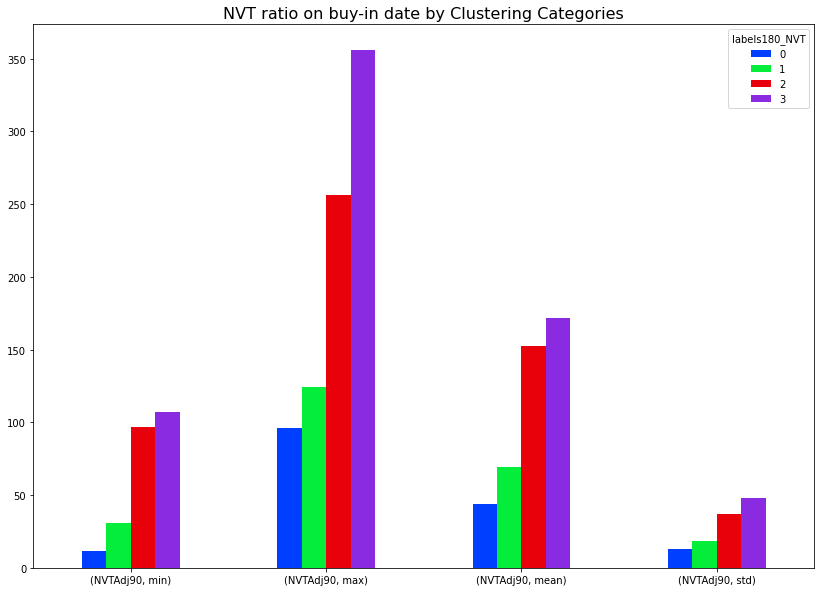

In [51]:
df180_NVT.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/180NVT_full_buyin')

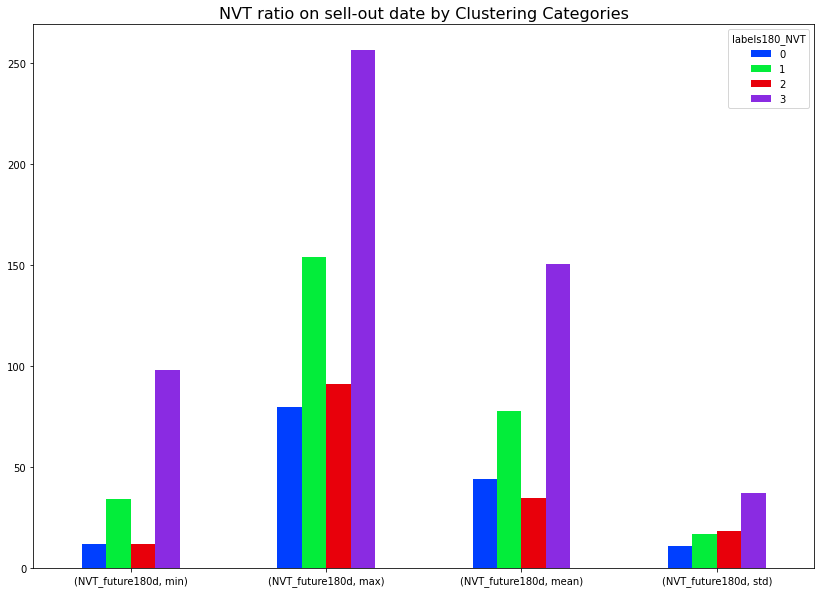

In [52]:
df180_NVT.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180NVT_full_sellout')

In [53]:
df_180_ROI=df_180_ROI.transpose()
df_180_ROI.columns=['labels180_NVT=0', 'labels180_NVT=1','labels180_NVT=2', 'labels180_NVT=3']
df_180_ROI.head()

,labels180_NVT=0,labels180_NVT=1,labels180_NVT=2,labels180_NVT=3
future180d_ROI_min,-83.624579,-72.154165,-90.097127,733.502203
future180d_ROI_max,1421.459550,7921.296584,7152.736386,14130.353592
future180d_ROI_mean,166.065831,59.623131,1470.307520,3647.908616
future180d_ROI_std,230.166387,373.287564,2038.223653,3261.507428


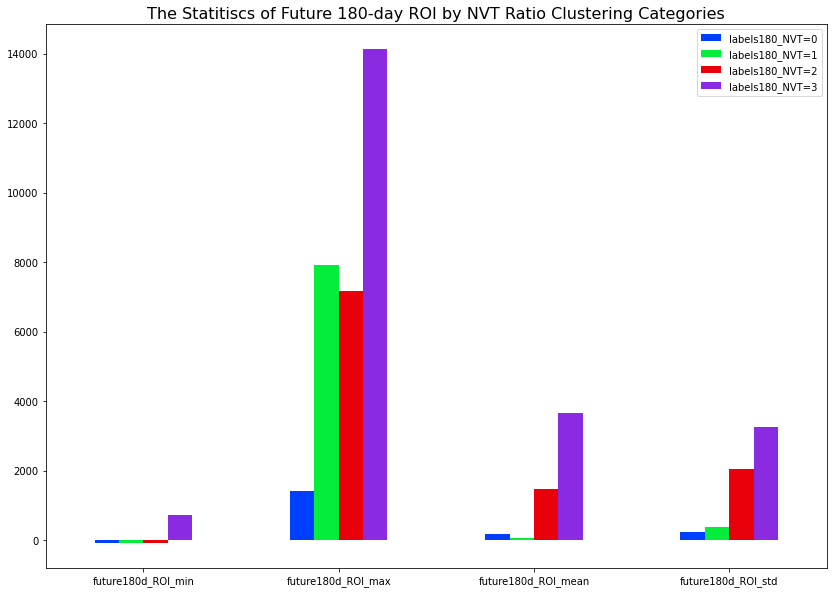

In [54]:
df_180_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 180-day ROI by NVT Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/180ROI_full_NVT')

In [55]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_180[['PM','PM_future180d']])
labels180 = model.predict(df_180[['PM','PM_future180d']])
labels180.reshape(-1,1)
df_180['labels180']=labels180
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d,labels180,labels180_NVT
2010-10-15,0.463068,1.119829,154.643925,79.217615,786.019103,30.998689,4.099103,2,2
2010-10-16,0.418963,1.288066,144.681892,84.173979,888.742343,11.602674,2.624067,2,2
2010-10-17,0.434969,1.236760,147.263082,82.118080,864.385428,18.085074,5.711558,2,2
2010-10-18,0.432914,1.384170,145.972987,85.980433,922.102400,11.418262,3.980140,2,2
2010-10-19,0.391364,1.498583,137.869691,87.829926,1025.760741,4.899486,5.625993,0,2


In [56]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,1.439698,1.266096
1,49.837862,5.148512
2,19.092676,3.321805
3,105.480729,8.705485


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

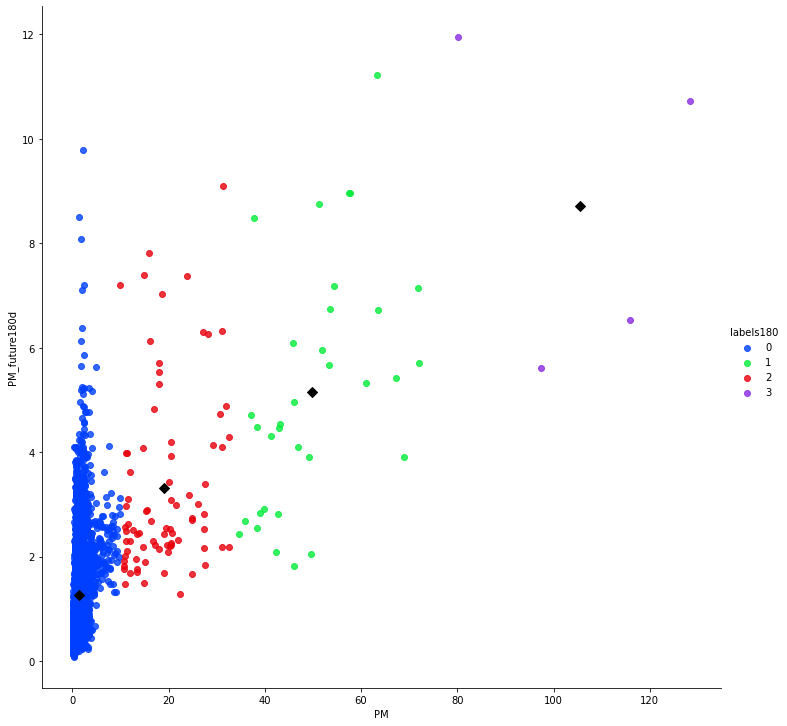

In [58]:
plt.figure(figsize=(14, 10))
sns.lmplot('PM','PM_future180d', data=df_180, hue='labels180', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('/content/drive/My Drive/CVML2021/PM180_full')

In [59]:
df_180_ROI=df_180[['future180d_ROI','labels180']].groupby('labels180', as_index=False).agg(['min', 'max','mean','std'])
df_180_ROI.columns = ["_".join(x) for x in df_180_ROI.columns.ravel()]
df_180_ROI.index.name=None
df_180_ROI.head()

,future180d_ROI_min,future180d_ROI_max,future180d_ROI_mean,future180d_ROI_std
0,-90.097127,6380.407411,125.853142,269.704680
1,683.000046,14130.353592,3109.623434,2936.933079
2,-51.750187,12527.431587,3798.382864,2713.549561
3,733.886349,2195.245904,1588.496284,638.324696


In [60]:
df180_PM=df_180[['PM','PM_future180d','labels180']].groupby('labels180').agg(['min', 'max','mean','std'])
df180_PM=df180_PM.transpose()
df180_PM

labels180                  0          1          2           3
PM            min   0.081659  34.732677   9.865902   80.100067
              max   9.977635  71.973830  32.631956  128.418139
              mean  1.439698  49.837862  19.092676  105.480729
              std   1.347603  10.954156   6.694704   21.176344
PM_future180d min   0.081659   1.830157   1.277352    5.615563
              max   9.781603  11.224044   9.100518   11.943117
              mean  1.266096   5.148512   3.321805    8.705485
              std   0.969170   2.358666   1.745244    3.098419

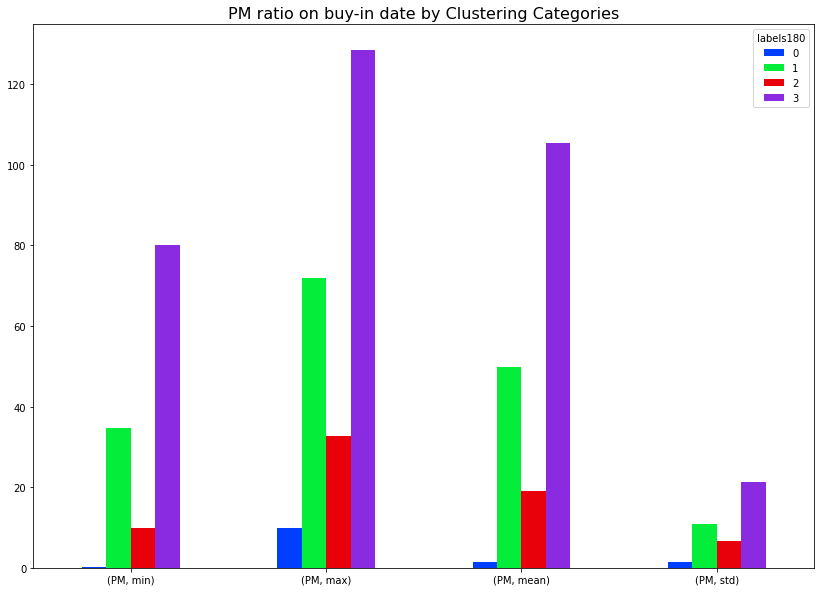

In [61]:
df180_PM.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180PM_full_buyin')

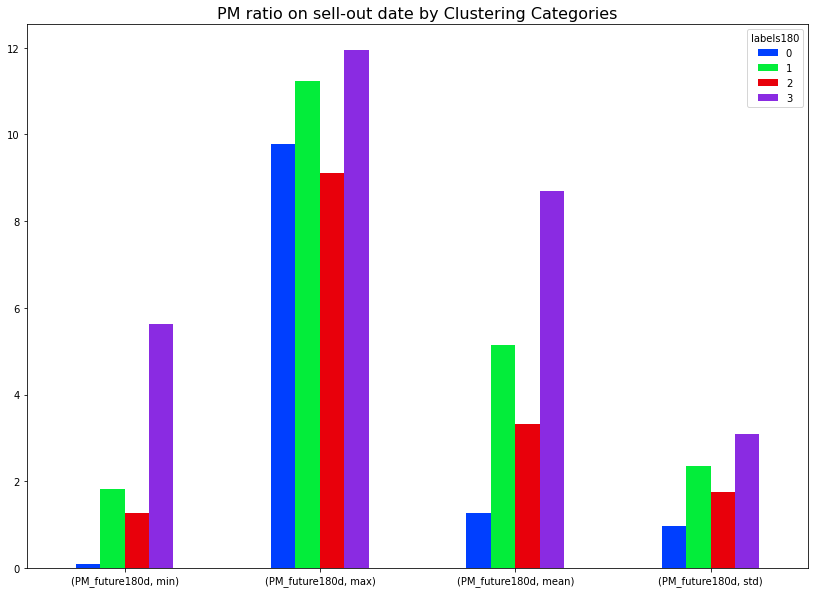

In [62]:
df180_PM.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180PM_full_sell-out')

In [63]:
df_180_ROI=df_180_ROI.transpose()
df_180_ROI.columns=['labels180=0', 'labels180=1','labels180=2', 'labels180=3']
df_180_ROI.head()

,labels180=0,labels180=1,labels180=2,labels180=3
future180d_ROI_min,-90.097127,683.000046,-51.750187,733.886349
future180d_ROI_max,6380.407411,14130.353592,12527.431587,2195.245904
future180d_ROI_mean,125.853142,3109.623434,3798.382864,1588.496284
future180d_ROI_std,269.704680,2936.933079,2713.549561,638.324696


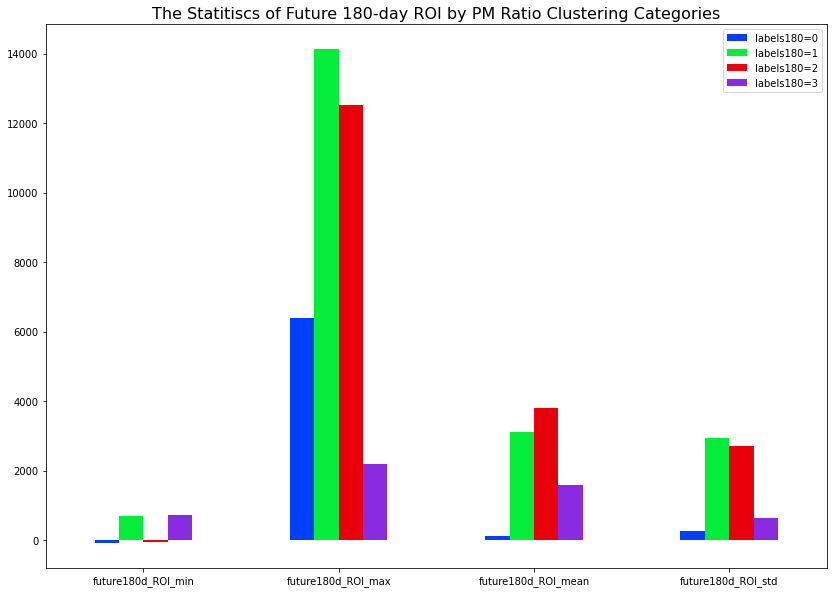

In [64]:
df_180_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 180-day ROI by PM Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/180ROI_fullPM')

In [65]:
df.to_csv('/content/drive/My Drive/CVML2021/btc_Kmeans_robust180_2020_12_31.csv')